# # Building a Music Recommendation System 

# #Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

# #Loading and Cleaning the Dataset

In [2]:
tracks = pd.read_csv('data.csv')


In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

In [4]:
tracks.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [5]:
tracks.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [6]:
tracks.size

3228271

In [7]:
tracks.isnull().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [8]:
tracks.shape

(169909, 19)

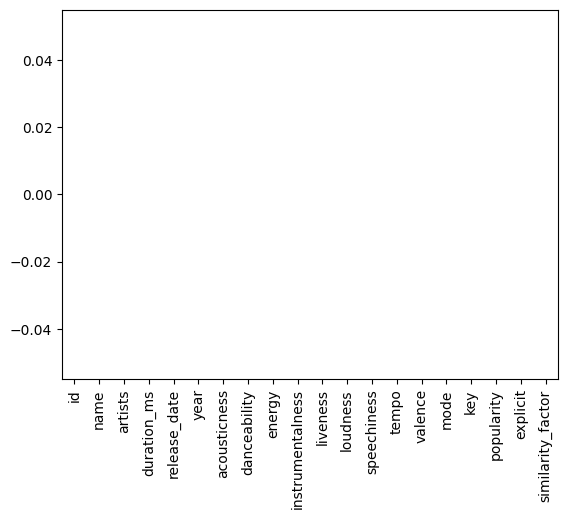

In [32]:
# for check if null value i
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

#tracks = tracks.drop(['release_date'], axis = 1)

In [10]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

# #Scaling Numerical Features

In [11]:
numeric_tracks = tracks.select_dtypes(include=[np.number])


In [12]:
numeric_tracks.head()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,158648,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,282133,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,104300,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,180760,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,687733,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_tracks_scaled = scaler.fit_transform(numeric_tracks)


# #t-SNE for Dimensionality Reduction and Visualization

In [14]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(numeric_tracks_scaled[:500])  


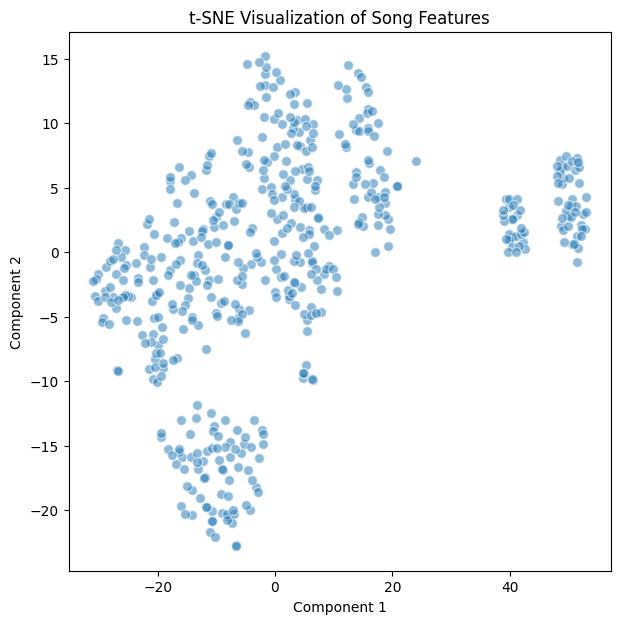

In [15]:
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.5, edgecolors='w', s=50)
plt.title('t-SNE Visualization of Song Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [16]:
tracks['name'].nunique(), tracks.shape

(132939, (169909, 19))

# #Exploring Popularity and Year Trends

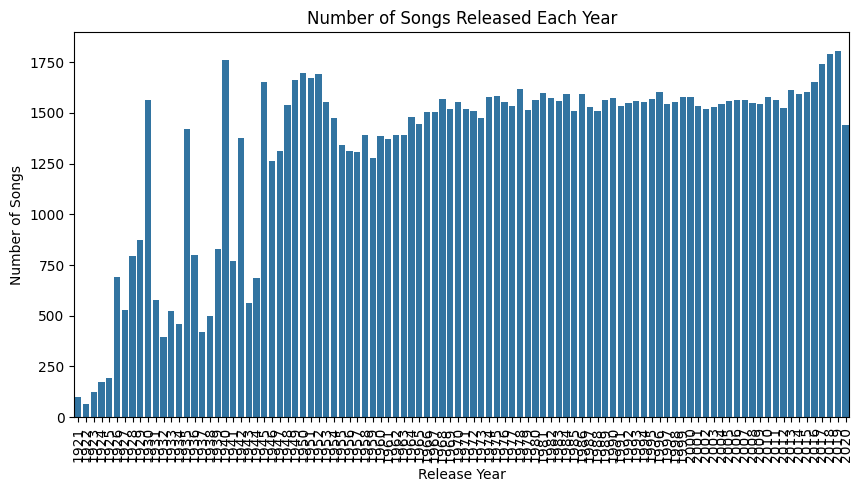

In [17]:

tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)


plt.figure(figsize=(10, 5))
sb.countplot(x='year', data=tracks)
plt.xticks(rotation=90) 
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Released Each Year')
plt.show()

# #Distribution of Numerical Features

In [18]:
floats = [col for col in tracks.columns if tracks[col].dtype == 'float']

print(f"Number of float columns: {len(floats)}")
print("Float columns:", floats)

Number of float columns: 9
Float columns: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


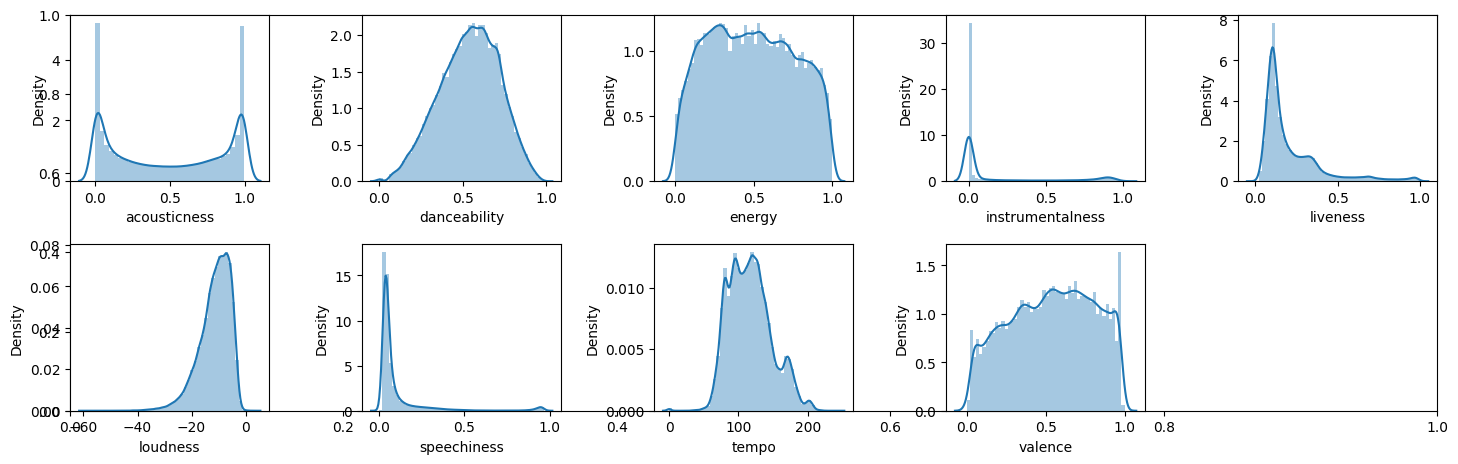

In [19]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [20]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [21]:
tracks.head(10)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
87942,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],200040,3/20/20,2020,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,1,1,100,0
87940,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",181733,4/17/20,2020,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,0.497,1,11,99,1
87949,7eJMfftS33KTjuF7lTsMCx,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",173333,2/8/20,2020,0.73100,0.726,0.431,0.000000,0.6960,-8.765,0.1350,144.026,0.348,0,8,97,0
87941,39Yp9wwQiSRIDOvrVg7mbk,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",165978,4/24/20,2020,0.23300,0.716,0.537,0.000000,0.1570,-7.648,0.0514,129.979,0.280,0,0,96,1
87844,4nK5YrxbMGZstTLbvj6Gxw,Supalonely,"['BENEE', 'Gus Dapperton']",223480,11/15/19,2019,0.30500,0.863,0.631,0.000030,0.1230,-4.689,0.0534,128.977,0.817,1,7,95,1
87852,62aP9fBQKYKxi7PDXwcUAS,ily (i love you baby) (feat. Emilee),"['Surf Mesa', 'Emilee']",176547,11/26/19,2019,0.06860,0.674,0.774,0.001880,0.3930,-7.567,0.0892,112.050,0.330,0,11,95,0
87946,127QTOFJsJQp5LbJbu3A1y,Toosie Slide,['Drake'],247059,4/3/20,2020,0.32100,0.834,0.454,0.000006,0.1140,-9.750,0.2010,81.618,0.837,0,1,95,1
87840,0nbXyq5TXYPCO7pr3N8S4I,The Box,['Roddy Ricch'],196653,12/6/19,2019,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,116.971,0.642,0,10,95,1
87951,4NhDYoQTYCdWHTvlbGVgwo,GOOBA,['6ix9ine'],132303,5/8/20,2020,0.02640,0.611,0.688,0.000000,0.2510,-5.688,0.3410,178.462,0.393,1,1,94,1
87952,24ySl2hOPGCDcxBxFIqWBu,Rain On Me (with Ariana Grande),"['Lady Gaga', 'Ariana Grande']",182200,5/22/20,2020,0.02100,0.672,0.855,0.000000,0.3230,-3.764,0.0397,123.056,0.646,1,9,94,0


In [22]:
tracks.shape

(10000, 19)

In [23]:
print(tracks.columns)

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')


# #Cosine Similarity to Calculate Similarities

In [24]:
def get_similarities(song_name, data):
    
    # Check song exists in the dataset
    if data[data['name'] == song_name].shape[0] == 0:
        raise ValueError(f"Song '{song_name}' not found in the dataset.")

    # Extract features for the input song
    song_features = data[data['name'] == song_name].select_dtypes(include=np.number).drop(columns=['popularity'])
    song_vector1 = song_features.to_numpy()

    # Extract features for all songs in the dataset
    all_features = data.select_dtypes(include=np.number).drop(columns=['popularity'])
    all_vectors = all_features.to_numpy()

    # Compute cosine similarity between the input song and all other songs
    similarities = cosine_similarity(song_vector1, all_vectors).flatten()
    return similarities







# #Recommending Songs

In [25]:
def recommend_songs(song_name, data):
    try:
        # Compute similarity scores
        data['similarity_factor'] = get_similarities(song_name, data)
    except ValueError as e:
        # Handle the case where the song is not found
        print(e)
        print('\nSome songs you may like:\n')
        print(data.sample(n=5)[['name', 'artists']])
        return
    
    # Sort songs by similarity and popularity
    recommendations = data.sort_values(by=['similarity_factor', 'popularity'], ascending=[False, False])

    # Exclude the input song from recommendations
    recommendations = recommendations[recommendations['name'] != song_name]

    # Select top 5 recommendations
    top_recommendations = recommendations[['name', 'artists', 'popularity']].head(5)
    top_recommendations.reset_index(drop=True, inplace=True)
    
    # Print recommendations
    print(f"\nTop recommendations similar to '{song_name}':\n")
    for idx, row in top_recommendations.iterrows():
        print(f"{idx + 1}. {row['name']} by {row['artists']} (Popularity: {row['popularity']})")

   
    top_recommendations.plot(kind='bar', x='name', y='popularity', legend=False)
    plt.title('Top 5 Recommended Songs by Popularity')
    plt.xlabel('Song')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Top recommendations similar to 'Shape of You':

1. My Time by ['BTS'] (Popularity: 77)
2. Jerry Sprunger (with T-Pain) by ['Tory Lanez', 'T-Pain'] (Popularity: 74)
3. Unforgettable by ['French Montana', 'Swae Lee'] (Popularity: 81)
4. F**kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar) by ['A$AP Rocky', 'Drake', '2 Chainz', 'Kendrick Lamar'] (Popularity: 76)
5. Broken Whiskey Glass by ['Post Malone'] (Popularity: 64)


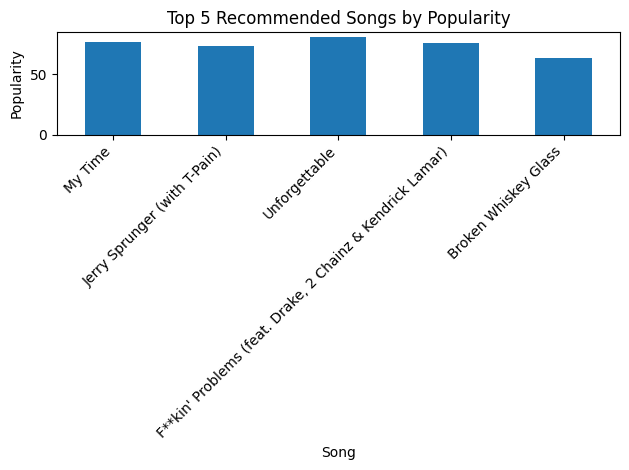

In [26]:
recommend_songs('Shape of You', tracks)



Top recommendations similar to 'Water Under the Bridge':

1. Lake Shore Drive by ['Aliotta Haynes Jeremiah'] (Popularity: 68)
2. The Look by ['Roxette'] (Popularity: 69)
3. Hold the Line by ['TOTO'] (Popularity: 76)
4. Llamado de Emergencia by ['Daddy Yankee'] (Popularity: 71)
5. Still Falling For You - From "Bridget Jones's Baby" by ['Ellie Goulding'] (Popularity: 64)


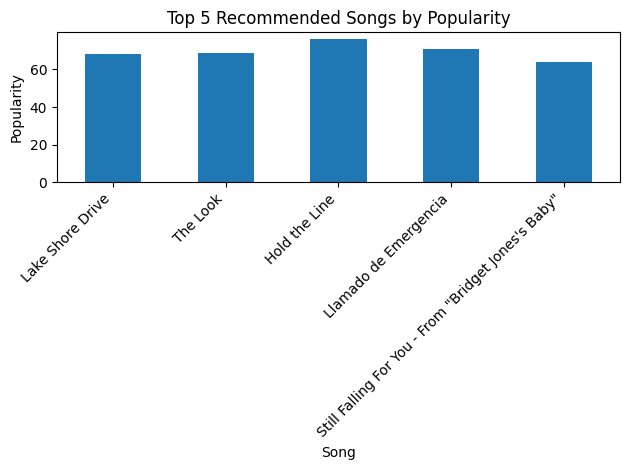

In [31]:
recommend_songs('Water Under the Bridge', tracks)
